# Bag Of Patterns Updated June 28

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import zipfile 

zip = zipfile.ZipFile("data.zip")

In [3]:
links = []
for i in zip.namelist():
    if i[-1] == "v":
        links.append(i)

In [4]:
li = []
for j in links:
    df = pd.read_csv(j, index_col=None, header=0)
    li.append(df)

In [5]:
category = []

for i in range(0,500):
    if i <=100:
        category.append(1)
    elif i <= 200:
        category.append(2)
    elif i <=300:
        category.append(3)
    elif i<=400:
        category.append(4)
    else:
        category.append(5)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(li[200:400], category[200:400], test_size=0.25, random_state=200)

In [8]:
from pyts.transformation import BagOfPatterns
bop = BagOfPatterns(window_size=5, word_size=3, n_bins=2,
                    numerosity_reduction=False, sparse=False)

# Good Functions


In [85]:
def TotalFeatures(data):
    X_bop = []
    dicts = {}
    for i in range(len(data)):
        X_train1 = np.asarray(data[i], dtype=object)
        X_train2 = X_train1.reshape(1,len(X_train1))
        X_bop.append(bop.fit_transform(X_train2))
        for j in range(len(list(bop.vocabulary_.values()))):
        #print(j)
        #print(str(list(bop.vocabulary_.values())[j]))
        #print(X_bop[-1][0][j] / sum(X_bop[-1][0]))
        #dicts[list(bop.vocabulary_.values())[j]] = X_bop[i][0][j] / sum(X_bop[i][0])
            if dicts.get(list(bop.vocabulary_.values())[j]):
                dicts[list(bop.vocabulary_.values())[j]] = X_bop[i][0][j] / sum(X_bop[i][0]) + dicts.get(list(bop.vocabulary_.values())[j])
            else:
                dicts[list(bop.vocabulary_.values())[j]] = X_bop[i][0][j] / sum(X_bop[i][0])
    return dicts

In [25]:
X_bop = []
X_train1 = np.asarray(X_train[0], dtype=object)
X_train2 = X_train1.reshape(1,len(X_train1))
X_bop.append(bop.fit_transform(X_train2))

In [210]:
X_train, X_test, y_train, y_test = train_test_split(li[200:300], category[200:300], test_size=0.2, random_state=102)

In [212]:
TotalFeatures(X_test)

{'baa': 3.177069540132073,
 'bab': 2.774975630698902,
 'aab': 4.069510621539517,
 'abb': 3.1756687701489192,
 'aba': 2.8951089179836886,
 'bba': 2.4844034322425133,
 'aaa': 0.9207029532287351,
 'bbb': 0.5025601340256514}

In [213]:
X_train2

array([[10.952, 10.645, 10.61, 10.992, 11.09, 10.902000000000001, 11.182,
        10.669, 11.139000000000001, 10.198, 10.193, 10.068, 8.669, 9.929,
        10.308, 9.956, 10.73, 10.77, 12.107999999999999, 12.286, 12.112,
        12.388, 12.431, 11.960999999999999, 11.748, 12.43, 12.587,
        12.384, 11.925, 11.504000000000001, 11.370999999999999, 11.05,
        10.839, 11.488, 10.593, 10.235, 9.96, 9.959, 9.851, 9.492, 9.427,
        8.991, 9.637, 9.981, 10.651, 9.777999999999999, 9.7, 11.157,
        10.835999999999999, 10.564, 10.277000000000001,
        10.857000000000001, 10.978, 11.035, 11.155999999999999, 11.9,
        12.245999999999999, 12.245999999999999, 12.194,
        12.524000000000001, 11.118, 11.059000000000001, 11.797, 11.253,
        10.877, 10.043, 10.681, 10.597999999999999, 10.665, 10.501,
        10.045, 10.514000000000001, 10.002, 10.710999999999999, 10.042,
        11.002, 10.775, 10.67, 11.073, 10.913, 11.314, 10.651, 11.193,
        10.812000000000001, 10.70

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
hi = TotalFeatures(li[200:400])

In [41]:
 X_train5, X_test5, y_train5, y_test5 = train_test_split(li[200:400],category[200:400], test_size=0.33, random_state=42)

In [27]:
abc = TotalFeatures(X_train)

In [30]:
X_train[0]

,acc_z
0,10.094
1,10.098
2,10.341
3,10.584
4,10.345
...,...
142,10.236
143,10.193
144,10.216
145,9.577


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
bop = BagOfPatterns(window_size=10, word_size=3, n_bins=2,
                    numerosity_reduction=False, sparse=False)
X_bop = []
dicts = {}
for i in range(len(X_train5)):
        X_train1 = np.asarray(X_train5[i], dtype=object)
        X_train2 = X_train1.reshape(1,len(X_train1))
        X_bop.append(bop.fit_transform(X_train2))

In [50]:
X_bop

[array([[15,  3, 18, 18,  7, 17]], dtype=int64),
 array([[ 3, 54, 31, 59, 61, 28, 53,  2]], dtype=int64),
 array([[18,  7, 20, 25,  6, 16]], dtype=int64),
 array([[ 5, 52, 19, 59, 54, 26, 49,  3]], dtype=int64),
 array([[ 1, 21,  2, 23, 22,  2, 22]], dtype=int64),
 array([[ 2, 48, 22, 50, 49, 24, 54,  2]], dtype=int64),
 array([[ 4, 54, 17, 55, 50, 20, 56,  6]], dtype=int64),
 array([[27,  3, 24, 24,  3, 21]], dtype=int64),
 array([[ 5, 75, 33, 58, 71, 31, 64,  4]], dtype=int64),
 array([[ 3, 74, 25, 65, 49, 22, 50,  2]], dtype=int64),
 array([[20,  4, 24, 14,  5, 15]], dtype=int64),
 array([[ 1, 64, 34, 51, 62, 22, 56]], dtype=int64),
 array([[64, 15, 57, 71, 17, 66]], dtype=int64),
 array([[ 4, 49, 20, 58, 48, 23, 53,  5]], dtype=int64),
 array([[11,  4, 14, 15,  6, 18,  1]], dtype=int64),
 array([[20,  2, 19, 27,  4, 25,  1]], dtype=int64),
 array([[25,  2, 19, 28,  3, 19]], dtype=int64),
 array([[45, 11, 65, 45, 27, 63,  1]], dtype=int64),
 array([[ 1, 55, 25, 60, 55, 22, 58,  1]],

# Function to Properly Arrange Data

In [86]:
def CreateFeatures(data):
    X_bop = []
    dicts = {}
    for i in range(len(data)):
        X_train1 = np.asarray(data[i], dtype=object)
        X_train2 = X_train1.reshape(1,len(X_train1))
        X_bop.append(bop.fit_transform(X_train2))
        dicts[i] = {}
        for j in range(len(list(bop.vocabulary_.values()))):
            dicts[i][list(bop.vocabulary_.values())[j]] = X_bop[i][0][j] / sum(X_bop[i][0]) * 100
    return dicts

In [10]:
new_data = CreateFeatures(X_train)

In [87]:
def TransformTrain(X,y):
    new_data = CreateFeatures(X)
    df = pd.DataFrame(new_data.values())
    df["type"] = y
    df = df.fillna(0)
    return df

In [88]:
def TransformTest(X):
    new_data = CreateFeatures(X)
    df = pd.DataFrame(new_data.values())
    df = df.fillna(0)
    return df

In [46]:
new_data.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])

In [17]:
df = pd.DataFrame(new_data.values())

In [13]:
df["type"] = y_train

In [14]:
sum(df["type"]==3)

79

In [125]:
df = df.fillna(0)

In [126]:
df

,bba,baa,bab,aba,aab,abb,aaa,bbb,type
0,0.724638,18.115942,5.797101,24.637681,16.666667,6.521739,26.811594,0.724638,3
1,17.857143,8.928571,21.428571,21.428571,19.642857,8.928571,0.000000,1.785714,3
2,5.714286,19.047619,20.952381,24.285714,7.142857,21.904762,0.000000,0.952381,4
3,3.960396,20.792079,23.762376,18.811881,4.950495,27.722772,0.000000,0.000000,3
4,0.432900,20.779221,5.627706,20.779221,8.225108,23.809524,19.913420,0.432900,4
...,...,...,...,...,...,...,...,...,...
145,23.076923,8.974359,21.794872,23.076923,19.230769,3.846154,0.000000,0.000000,3
146,2.970297,28.712871,5.940594,13.861386,24.752475,23.762376,0.000000,0.000000,3
147,21.590909,5.681818,21.590909,5.681818,21.590909,23.863636,0.000000,0.000000,3
148,22.267206,8.906883,19.838057,1.214575,19.028340,7.692308,2.429150,18.623482,4


In [128]:
test = CreateFeatures(X_test)

In [129]:
df1 = pd.DataFrame(test.values())

In [130]:
df1 = df1.fillna(0)

# Implement Random Forest

In [89]:
X_train_rf = df.drop("type",axis=1)

KeyError: "['type'] not found in axis"

In [133]:
y_train_rf = df["type"]

In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [135]:
pred = rfc.predict(df1)

In [136]:
count = 0
for i in range(len(pred)):
    if pred[i] != y_test[i]:
        count+=1

In [92]:
count

8

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(confusion_matrix(y_test,pred))

[[25  2]
 [ 6 17]]


In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.81      0.93      0.86        27
           4       0.89      0.74      0.81        23

    accuracy                           0.84        50
   macro avg       0.85      0.83      0.84        50
weighted avg       0.85      0.84      0.84        50



In [115]:
print(confusion_matrix(y_test,pred))

[[14 12]
 [ 1 23]]


In [116]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.93      0.54      0.68        26
           4       0.66      0.96      0.78        24

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [117]:
count

13

# 3rd Seed

In [137]:
count

7

In [138]:
print(confusion_matrix(y_test,pred))

[[20  1]
 [ 6 23]]


In [139]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.77      0.95      0.85        21
           4       0.96      0.79      0.87        29

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.88      0.86      0.86        50



# Newly Created Functions

In [90]:
def TransformTrain(X,y):
    new_data = CreateFeatures(X)
    df = pd.DataFrame(new_data.values())
    df["type"] = y
    df = df.fillna(0)
    return df

In [91]:
def TransformTest(X):
    new_data = CreateFeatures(X)
    df = pd.DataFrame(new_data.values())
    df = df.fillna(0)
    return df

In [92]:
df_train = TransformTrain(X_train, y_train)
df_test = TransformTest(X_test)

In [93]:
X_train_rf = df_train.drop("type",axis=1)

In [94]:
y_train_rf = df_train["type"]

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [96]:
pred = rfc.predict(df_test)

In [97]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.73      0.52      0.61        21
           4       0.71      0.86      0.78        29

    accuracy                           0.72        50
   macro avg       0.72      0.69      0.70        50
weighted avg       0.72      0.72      0.71        50



# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_rf, y_train_rf)

DecisionTreeClassifier()

In [84]:
predTr = dt.predict(df_test)

In [85]:
print(classification_report(y_test, predTr))

              precision    recall  f1-score   support

           3       0.67      0.29      0.40        21
           4       0.63      0.90      0.74        29

    accuracy                           0.64        50
   macro avg       0.65      0.59      0.57        50
weighted avg       0.65      0.64      0.60        50



# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)

In [87]:
knn.fit(X_train_rf, y_train_rf)

KNeighborsClassifier()

In [88]:
predK = knn.predict(df_test)

In [89]:
print(classification_report(y_test, predK))

              precision    recall  f1-score   support

           3       0.53      0.76      0.63        21
           4       0.75      0.52      0.61        29

    accuracy                           0.62        50
   macro avg       0.64      0.64      0.62        50
weighted avg       0.66      0.62      0.62        50



In [42]:
y_train_rf

0      3
1      3
2      4
3      3
4      4
      ..
145    3
146    3
147    3
148    4
149    3
Name: type, Length: 150, dtype: int64

In [44]:
X_train_rf

,bba,baa,bab,aba,aab,abb,aaa,bbb
0,0.724638,18.115942,5.797101,24.637681,16.666667,6.521739,26.811594,0.724638
1,17.857143,8.928571,21.428571,21.428571,19.642857,8.928571,0.000000,1.785714
2,5.714286,19.047619,20.952381,24.285714,7.142857,21.904762,0.000000,0.952381
3,3.960396,20.792079,23.762376,18.811881,4.950495,27.722772,0.000000,0.000000
4,0.432900,20.779221,5.627706,20.779221,8.225108,23.809524,19.913420,0.432900
...,...,...,...,...,...,...,...,...
145,23.076923,8.974359,21.794872,23.076923,19.230769,3.846154,0.000000,0.000000
146,2.970297,28.712871,5.940594,13.861386,24.752475,23.762376,0.000000,0.000000
147,21.590909,5.681818,21.590909,5.681818,21.590909,23.863636,0.000000,0.000000
148,22.267206,8.906883,19.838057,1.214575,19.028340,7.692308,2.429150,18.623482


In [45]:
li[200]

,acc_z
0,10.492
1,10.057
2,10.473
3,10.114
4,9.695
...,...
81,11.229
82,10.326
83,11.252
84,11.283


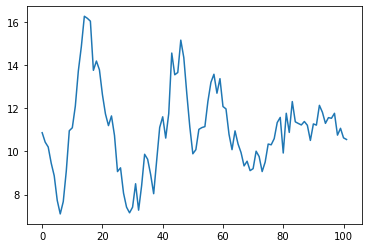

In [51]:
plt.plot(li[298])

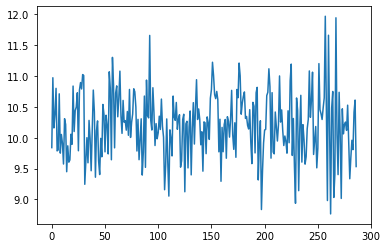

In [57]:
plt.plot(li[315])

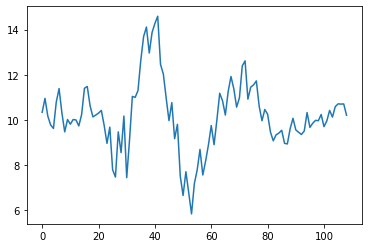

In [58]:
plt.plot(li[250])

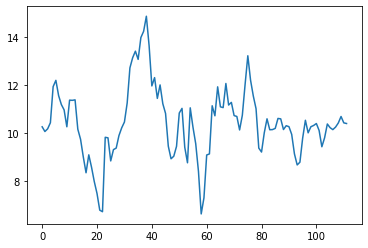

In [59]:
plt.plot(li[222])

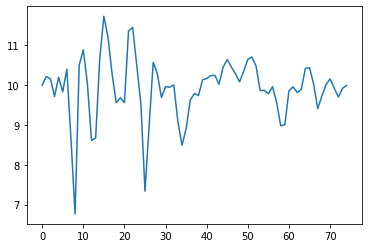

In [60]:
plt.plot(li[210])

# Work with Local Data

In [34]:
ACC_45 = pd.read_csv("test_accelerometer_t45.txt", delimiter="\t")
GPS_45 = pd.read_csv("test_gps_t45.txt", delimiter="\t")

In [41]:
test1 = ACC_45[(ACC_45["Unix Time (ms since Jan 1, 1970)"] <= 1655258345892) & (ACC_45["Unix Time (ms since Jan 1, 1970)"] >= 1655258341892)]

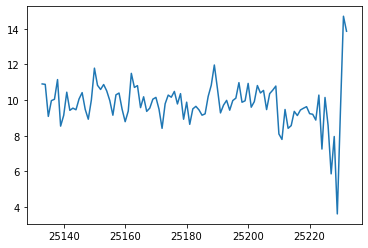

In [46]:
plt.plot(test1["Z"][50:150])

In [99]:
rfc.predict(qwe)


array([3, 3], dtype=int64)

In [98]:
qwe = TransformTest(mnb)

In [109]:
abc = list(test1["Z"][:100])
fed = list(test1["Z"][100:])
mnb = list([abc,fed])

rty = list(test2["Z"][:100])
gty = list(test2["Z"][100:])
lkj = list([rty,gty])



In [73]:
type(X_train)

list

In [66]:
len(X_train)

150

In [101]:
GPS_45[100:130]

,"Unix Time (ms since Jan 1, 1970)",Latitude,Longitude,Speed
100,1655257942911,45.510788,-73.623541,12.679999
101,1655257943899,45.510693,-73.623625,12.420000
102,1655257944912,45.510601,-73.623711,11.719999
103,1655257945919,45.510509,-73.623789,11.559999
104,1655257946901,45.510427,-73.623859,10.510000
105,1655257947912,45.510349,-73.623920,9.800000
106,1655257948905,45.510272,-73.623964,9.059999
107,1655257949911,45.510188,-73.624003,9.010000
108,1655257950903,45.510114,-73.624036,7.220000
109,1655257951910,45.510059,-73.624059,6.030000


In [108]:
test2 = ACC_45[(ACC_45["Unix Time (ms since Jan 1, 1970)"] <= 1655257969886) & (ACC_45["Unix Time (ms since Jan 1, 1970)"] >= 1655257962894)]

,"Unix Time (ms since Jan 1, 1970)",X,Y,Z
5634,1655257951921,0.761356,-0.555455,10.366894
5635,1655257951942,0.416591,-0.339977,10.180145
5636,1655257951962,1.379060,-0.105345,9.691729
5637,1655257951982,0.804452,-0.071826,10.615891
5638,1655257952002,0.555455,-0.129287,11.267113
...,...,...,...,...
5828,1655257955802,-0.598550,-0.181959,9.955091
5829,1655257955822,-0.938527,-0.296881,9.950302
5830,1655257955843,-0.928950,-0.248997,9.969456
5831,1655257955866,-1.101333,-0.421380,10.026917


In [110]:
qwd = TransformTest(lkj)

In [111]:
rfc.predict(qwd)

array([4, 3], dtype=int64)

# Github Data

In [16]:
url = "https://raw.githubusercontent.com/shouvikmani/Intelligent-Pothole-Detection/master/data/Pothole_Non_Pothole/trip1_combined.csv"
df = pd.read_csv(url)

In [30]:
np.mean(df["accelerometerZ"])

0.20702056815938263

In [22]:
df

,Unnamed: 0,timestamp,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ,potholes
0,0,1.492639e+09,40.447445,-79.944189,0.0,0.016998,-0.962234,0.203888,-0.016994,0.019259,0.007240,False
1,1,1.492639e+09,40.447445,-79.944189,0.0,0.050751,-0.962997,0.193954,-0.018083,0.004373,0.000870,False
2,2,1.492639e+09,40.447445,-79.944189,0.0,0.037415,-0.959229,0.191544,-0.014993,-0.009476,0.000937,False
3,3,1.492639e+09,40.447445,-79.944189,0.0,0.053787,-0.963852,0.277252,-0.046893,-0.001822,0.001657,False
4,4,1.492639e+09,40.447445,-79.944189,0.0,0.031647,-0.953003,0.271057,-0.007371,0.003238,-0.004349,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2212,1.492639e+09,40.446526,-79.947167,0.0,0.145248,-1.019073,0.116913,-0.051081,-0.009230,0.069871,False
2213,2213,1.492639e+09,40.446526,-79.947167,0.0,0.132523,-0.936829,0.188599,-0.076173,-0.008008,0.036558,False
2214,2214,1.492639e+09,40.446526,-79.947168,0.0,0.119171,-1.036392,0.141785,0.065057,-0.065304,0.034953,False
2215,2215,1.492639e+09,40.446526,-79.947168,0.0,0.160461,-0.955124,0.150879,0.008099,0.060577,-0.013934,False
